# Introduction

We also had the opportunity to make some predictions using the trees (which we stored in `y_pred`, by convention), and in a small table of 10 random observations, we compared them against a test subset of the dataset (which we stored in `y_test`, also by convention). While we were comfortably able to check for correct and incorrect predictions manually on this small number of observations, completing this process on massive datasets with thousands of observations would require an impossible amount of time.

Moreover, what if the number of incorrect predictions forces us to make changes to our tree? We would need to repeat this process all over again! It's clear that without metrics to evaluate our trees, we will never be sure if we have an optimal solution or not.

Therefore, in this lesson, we will learn how to do the following:

* Evaluate classification and regression trees
* Mitigate a natural tendency of decision trees to overfit the data
* Apply different optimization techniques for decision trees.

We'll start with some example datasets to learn how we can evaluate our trees. Then we will use two preprocessed versions of the students dataset — one for regression and one for classification — with their target columns properly adapted for each use case. This time, all the columns of the original dataset will be loaded; you can read their full descriptions here. The dataset has 649 observations in total, but due to One Hot Encoding, the 32 columns of the original dataset have become 46.

# Regression Metrics: RMSE

**Root mean squared error (RMSE)**, is the square root of the mean squared error (MSE). If you recall, we used the MSE as the criterion for determining the **optimal thresholds** for our regression tree back in the first lesson. However, here we use the MSE calculate the sum of square differences between the actual values in the dataset and the predicted values from the regression tree. **To get the RMSE, we take the square root of the MSE.**

As always, since it's measuring an error, **the closer RMSE is to 0**, the better! Keep in mind that **the RMSE is sensitive to the scale of our data**; the RMSE will be gigantic if we're working with astronomically large values, like the distances between stars. The opposite is also true; the RMSE will be very small if we're working with much smaller values, like the distances between atoms. For this reason, we need context to properly interpret the value of this metric.

    from sklearn.metrics import mean_squared_error

    mean_squared_error(y_test,
                      y_pred,
                      squared = False)

As a reminder, `y_test` stores the actual values after performing `train_test_split`, and `y_pred` stores the predictions made by our fitted regression tree. Also, setting the `squared` parameter to `False` is required to return the RMSE — if we leave it as the default `True`, we'll get the MSE instead.

$\displaystyle\text{RMSE} = \sqrt{\frac {1} {n} \sum\limits_{i=1}^{n} (\text{y_test}_i - \text{y_pred}_i)^2}$

Using variable names we are familiar with, we can also express this formula as the following:

$\displaystyle\text{RMSE} = \sqrt{\frac{(\text{y_test[0]} - \text{y_pred[0]})^2 + \ldots + (\text{y_test[n]} - \text{y_pred[n]})^2}{\text{len(y_test)}}}$



##Implementing RMSE

1. For each observation, find the difference **between** the corresponding values in `y_test` and `y_pred`, and then **square** it.

1. **Sum** all the squared differences, and **divide** the result by the total number of observations to obtain the MSE.

1. Find the square root of the MSE to obtain the RMSE.

Finally, just to mention some possible alternatives to using the RMSE, we can also use these:

* **Mean absolute error (MAE)** — we used this metric in the first lesson as well.
* **Median absolute error (MedAE)** — this is a good choice if we want to reduce the influence of outliers.

In [ ]:
y_test = [23.17, 31.92, 24.14]
y_pred = [22.49, 33.52, 24.09]

mse = ((y_test[0]-y_pred[0])**2 + (y_test[1]-y_pred[1])**2 + (y_test[2]-y_pred[2])**2)/len(y_test)

rmse = mse**0.5

#Regression Metrics: R²

Now let's look at the other popular metric for evaluating regression trees: R², which is pronounced "R-squared" and is known as the coefficient of determination. Like RMSE, R² also calculates the error between the actual values in the dataset and the predicted values from the regression tree.

**R² is a percentage that represents the proportion of the variance we see in our predictions that can be explained by the model.**

However, the advantage of **R²** over RMSE is that it doesn't depend on the scale of the data: no matter if we're measuring distances between stars or atoms, this metric will **always have a maximum value of 1**, which indicates a perfect match between the predicted values and the actual ones — while it is possible, this is a truly rare event!

Since R² is the default evaluation metric for regression trees, there are two ways we can calculate it:

##First Method

After instantiating the regression tree and fitting it to X_train and y_train, we can find the R² with the `score()` method from the DecisionTreeRegressor class:

    from sklearn.tree import DecisionTreeRegressor

    reg_tree = DecisionTreeRegressor()
    reg_tree.fit(X_train, y_train)
    reg_tree.score(X_test, y_test)

##Second Method

Once we've instantiated and fitted the regression tree, we use the `predict()` method on `X_test` and store the results in the variable `y_pred`. After that, we import the `r2_score` tool and use it to compare the values between `y_test` and `y_pred`:

    from sklearn.metrics import r2_score

    reg_tree = DecisionTreeRegressor()
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_test)
    r2_score(y_test, y_pred)

##Formula

$\displaystyle R^2 = 1 - \frac{RSS}{TSS}$

Where **RSS** is the residual sum of squares and **TSS** is the total sum of squares.


**Residual Sum of Squares (RSS)**

$\displaystyle RSS = \sum\limits_{i=1}^{n} \left(\text{y_test}_i - \text{y_pred}_i\right)^2$

**Total Sum of Squares (TSS):**
$\displaystyle TSS = \sum\limits_{i=1}^{n} \left(\text{y_test}_i - \overline{\text{y_test}}\right)^2$

Where $\overline{\text{y_test}}$ is the mean of the y_test column.


One last thing: while it might seem counterintuitive, it's possible for R² to be negative! This happens when our model fits the data so poorly that RSS is actually **larger** than TSS, so don't let the 'squared' in R² make you think it can't ever be negative!



In [ ]:
y_test = [23.17, 31.92, 24.14]
y_pred = [22.49, 33.52, 24.09]

print(y_test, y_pred)

y_test_mean = sum(y_test)/len(y_test)
rss = ((y_test[0]-y_pred[0])**2 + (y_test[1]-y_pred[1])**2 + (y_test[2]-y_pred[2])**2)

tss = ((y_test[0]-y_test_mean)**2 + (y_test[1]-y_test_mean)**2 + (y_test[2]-y_test_mean)**2)

r2 = 1 - (rss/tss)

[23.17, 31.92, 24.14] [22.49, 33.52, 24.09]


#  Classification Metrics: Accuracy and Others

As the default metric for classification, we have the accuracy score, which is the **total number of correct predictions (where `y_test` and `y_pred` match) divided by the total number of predictions made.** It works on both binary and multiclass target columns. There are two ways to calculate it:

#Classification Score - First Method

After instantiating the classification tree and fitting it to `X_train` and `y_train`, we can find the accuracy with the **score()** method from the tree instance:

    from sklearn.tree import DecisionTreeClassifier

    class_tree = DecisionTreeClassifier()
    class_tree.fit(X_train, y_train)
    class_tree.score(X_test, y_test)

## Classification Score - Second Method

Once we've instantiated and fit the classification tree, we use the `predict`() method on `X_test` and store the results in a variable `y_pred`. After that, we import the accuracy_score tool and use it to compare the values between `y_test` and `y_pred`

    from sklearn.metrics import accuracy_score

    class_tree = DecisionTreeClassifier()
    class_tree.fit(X_train, y_train)
    y_pred = class_tree.predict(X_test)
    accuracy_score(y_test, y_pred)

However, depending on the dataset, we might need to use a different classification metric:

* Precision: is the ratio of correctly classified positive predictions to the total number of predicted positives.

* Recall: is the ratio of correctly classified positive predictions to the total number of actual positives.

* F1-Score: is the harmonic mean of the previous two metrics.

However, depending on the dataset, we might need to use a different classification metric:

* Precision: is the ratio of correctly classified positive predictions to the total number of predicted positives.

* Recall: is the ratio of correctly classified positive predictions to the total number of actual positives.

* F1-Score: is the harmonic mean of the previous two metrics.

**All these metrics range from 0 (worst possible) to 1 (best possible).**





##Confusion Matrix

 let's explore how these metrics are calculated by using another example dataset about the predictions of player's actions in a popular card game:

| y_pred  | y_test  |
|---------|---------|
| Wild    | Wild    |
| Skip    | Skip    |
| Skip    | Skip    |
| Wild    | Skip    |
| Reverse | Reverse |
| Reverse | Reverse |


 Since we have more than two classes, if we use a regular confusion matrix, the resulting array would be confusing. Instead, let's import the more intuitive `multi label confusion matrix` from scikit-learn:

    from sklearn.metrics import multilabel_confusion_matrix

    print(multilabel_confusion_matrix(
                        df["y_test"],
                        df["y_pred"],
                        labels = ["Reverse", "Skip", "Wild"])
        )

output

    array([[[4, 1],
    [0, 1]], # "Reverse"

    [[3, 2],
    [1, 0]], # "Skip"

    [[1, 1],
    [3, 1]]]) # "Wild"

Notice that the arrays in the output match the order of the labels passed to the function. The values within each array correspond to the following:

    [[True Negatives, False Positives],
    [False Negatives, True Positives]]

Although we might think the first element of the mulitlabel confusion matrix would be for **True Positives**, scikit-learn organizes the output a little differently and has the value for **True Negatives** in position `(0, 0)` and the value for **True Positives** in position `(1, 1)`.

* **True positives (TP)** are the observations where the class is correctly predicted; in other words, the class appears in both y_test and y_pred. The "Reverse" class was correctly predicted once; same for "Wild".

* **True negatives (TN)** are the observations where the class is correctly not predicted; in other words, the class doesn't appear in either y_test or y_pred. The "Reverse" class was correctly not predicted in four observations, while "Skip" was correctly not predicted in three.

* **False positives (FP)** / Type I Errors are observations where the class is actually absent, but the model wrongly predicts that it's present; in other words, the class will appear in y_pred but not in y_test.

* **False negatives (FN)** / Type II Errors are observations where the class is actually present, but the model wrongly predicts that it's absent; in other words, the class won't appear in y_pred, but it will be in y_test.

Having explained these terms, we can update our evaluation metrics formulas to use them on the exercise:

* $\displaystyle\text{Accuracy} = \frac{(\text{TP + TN})}{(\text{TP + TN + FP + FN})}$

* $\displaystyle\text{Precision} = \frac{\text{TP}}{(\text{TP + FP})}$

* $\displaystyle\text{Recall} = \frac{\text{TP}}{(\text{TP + FN})}$

* $\displaystyle\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}$


The "Skip" class has 2 false positives and 1 false negative.

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd


toy_df = pd.DataFrame(data={"y_pred": ["G", "G", "R", "R", "PG"],
                            "y_test": ["G", "PG", "R", "R", "R"]}
                     )

print(toy_df)

#correct predictions / total number of predictions
df_accuracy = 3/5

multimatrix = multilabel_confusion_matrix(
                     toy_df["y_test"],
                     toy_df["y_pred"],
                     labels = ["G", "PG", "R"])
print(multimatrix)



  y_pred y_test
0      G      G
1      G     PG
2      R      R
3      R      R
4     PG      R
[[[3 1]
  [0 1]]

 [[3 1]
  [1 0]]

 [[2 0]
  [1 2]]]


# Classification Metrics: Classification Report

let's take a look at a practical `scikit-learn `tool we can use to automate the entire process: the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)!

In [ ]:
df = pd.DataFrame(data={"y_pred": ["G", "G", "R", "R", "PG"],
                            "y_test": ["G", "PG", "R", "R", "R"]}
                     )


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df["y_test"],
                            df["y_pred"]))

              precision    recall  f1-score   support

           G       0.50      1.00      0.67         1
          PG       0.00      0.00      0.00         1
           R       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



Let's explore this output:

* All the values in the table (except the integers in `support`) are rounded to two decimals.

* For each class, we can see their respective `precision`, `recall`, and `f1-score`.

* The `support` column shows the number of observations in `y_test` with that class.

  * Notice that the lower three values of support show the total number of observations.

* The `macro avg` (macro average) is obtained by summing all of the metrics for a specific column and then dividing by the number of distinct classes.
  * For example, the `macro avg` for the `precision` column is: $\displaystyle\frac{\left(0.5 + 0.0 + 1.0\right)}{3} = 0.\overline{5}$

* The `weighted avg `(weighted average) is obtained by taking the value in `support` (that is, the **number of observations in `y_test` with that specific class**) and **dividing** it by the **total number of observations** to give you the weight. We then multiply that weight by the selected metric in that specific class.

  After this, we repeat the above steps for the rest of the classes, and once we have all the results for each class, we **sum them all**.

  * For example, the `weighted avg` for the `precision `column is:
  $\left(\frac{1}{5} \times 0.5\right) + \left(\frac{1}{5} \times 0.0\right) + \left(\frac{3}{5} \times 1.0\right) = 0.70$

  Note that the denominator for the weights is 5, representing the total number of observations, and the numerators are 1, 1, and 3, representing the number of observations for each respective class.

* The accuracy in this case is 0.60 for the entire dataset.

#Exercise

    #macro = sum of metrics (specific column) / n distints classes
    macro_recall = round((1+0+0.67)/3,2)

    #weighted = n_obs in y_test (support value for specific  class) / total n_observation

    #then multiply by the metric of that class
    weighted_f1 = round(((1/5)*0.67) + ((1/5)*0) + ((3/5)*0.8),2)

#  Overfitting and Pruning

Now let's revisit a dataset we used in the previous lesson, the students dataset. Previously, we plotted both a classification and a regression tree, but they were instantiated with the max_depth = 3 argument that limited their depth to three levels.

If we removed that parameter, due to their recursive nature, our trees would grow until **all the information is grouped homogeneously into pure leaves.** So after several seconds (or minutes!) of calculations, our trees would look like this:


*Unpruned Regression Tree*
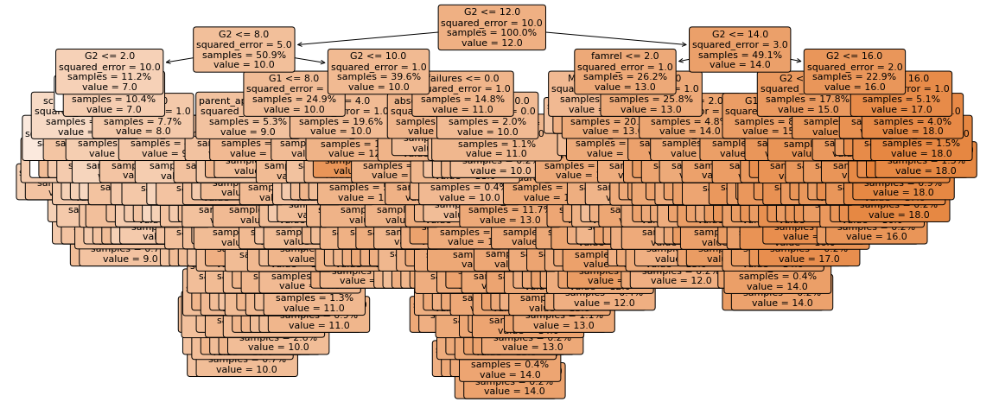


*Unpruned Classification Tree*

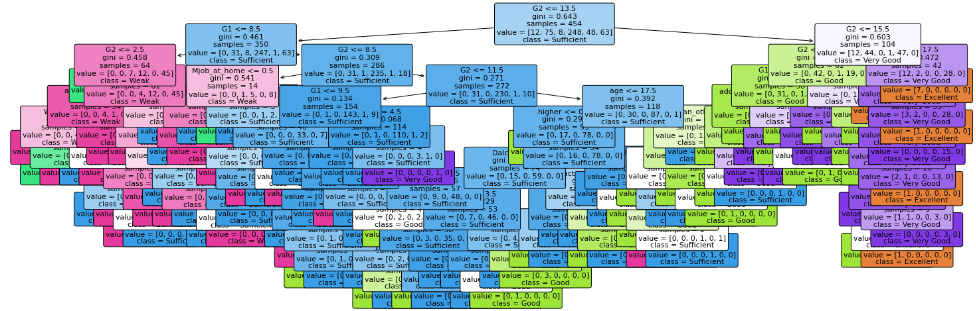

Unfortunately, not only do these large and cluttered trees look bad, they're useless because of **overfitting** the data. As a reminder, overfitting happens when a machine learning algorithm adapts so specifically to the training data that it becomes unable to make reliable predictions on unseen data.

To avoid this outcome, we're required to perform a **pruning** processes, which can be divided into two main categories:

* **Pre-pruning:** establishing conditions in which the decision tree stops generating thresholds before finishing the recursive process. One example of this is the parameter `max_depth`, that imposes a limited number of levels and then stops the Tree generation.

* **Post-pruning**: as the name implies, this category encompasses all the optimization techniques applied after the decision tree has been generated.

By pruning our trees, we'll be solving two problems at the same time — we'll be coincidently dealing with another disadvantage of decision trees: the **considerable computation time required to build them.**

Remember that during the generation of the splits, the algorithm has to iterate over every pair of distinct values, in every feature column, to determine all the potential thresholds. Although this isn't a big problem with small datasets, we're guaranteed to experience significant delays when working with larger ones.

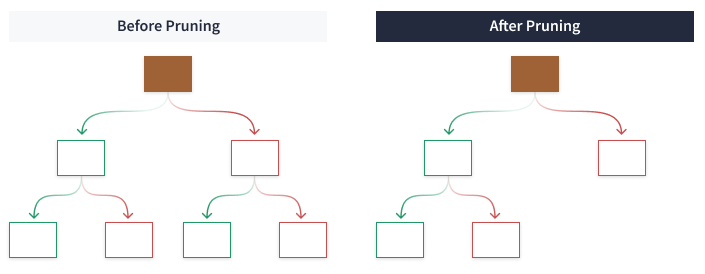

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# THIS IS A CLASSIFICATION EXERCISE.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

df_class = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/students_clf.csv", sep=";")
X = df_class.drop(["G3_qual"], axis=1)
y = df_class["G3_qual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=24)

# Your code starts here

unpruned_tree = DecisionTreeClassifier(random_state=24)
unpruned_tree.fit(X_train,y_train)
score_unpruned_train = unpruned_tree.score(X_train,y_train)

score_unpruned_test = unpruned_tree.score(X_test,y_test)

#pruned tree
pruned_tree = DecisionTreeClassifier(max_depth=4,random_state=24)
pruned_tree.fit(X_train,y_train)
score_pruned_train = pruned_tree.score(X_train,y_train)
score_pruned_test = pruned_tree.score(X_test,y_test)

# Your code ends here

print("____UNPRUNED TREE____")
print("Score on train subset:", score_unpruned_train)
print("Score on test subset:", score_unpruned_test)

print("____PRUNED TREE____")
print("Score on train subset:", score_pruned_train)
print("Score on test subset:", score_pruned_test)

____UNPRUNED TREE____
Score on train subset: 1.0
Score on test subset: 0.6871165644171779
____PRUNED TREE____
Score on train subset: 0.8209876543209876
Score on test subset: 0.7484662576687117


#Features Importances

Considering how many adjustments are still necessary to optimize the tree, it would be smart to find ways to further reduce the computation time. Both regression and classification trees have an attribute, `feature_importances_`, that provides us with an array of normalized values that measure how much each feature column contributes to reducing the criterion metric. This would allow us to leave out all the columns that are never selected for use as thresholds

In the case of the classification tree for the Students dataset with `criterion = "gini"` and `max_depth = 4`, this is the array we get:


In [8]:
print(pruned_tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.01918754 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01609519
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.03539767 0.31142908 0.61789051]


The order of values in the array above matches the column order of the `feature_names_in_ `attribute:

In [9]:
print(pruned_tree.feature_names_in_)

['Mjob_at_home' 'Mjob_health' 'Mjob_other' 'Mjob_services' 'Mjob_teacher'
 'Fjob_at_home' 'Fjob_health' 'Fjob_other' 'Fjob_services' 'Fjob_teacher'
 'reason_course' 'reason_home' 'reason_other' 'reason_reputation'
 'guardian_father' 'guardian_mother' 'guardian_other' 'school_gp'
 'sex_fem' 'age' 'address_urban' 'famsize_more3' 'parent_apart' 'Medu'
 'Fedu' 'traveltime' 'studytime' 'failures' 'schoolsup' 'famsup' 'paid'
 'activities' 'nursery' 'higher' 'internet' 'romantic' 'famrel' 'freetime'
 'goout' 'Dalc' 'Walc' 'health' 'absences' 'G1' 'G2']


As you can see, `scikit-learn` doesn't automatically make it easy to interpret this information! So let's use `matplotlib` to display this information in a more useful way:

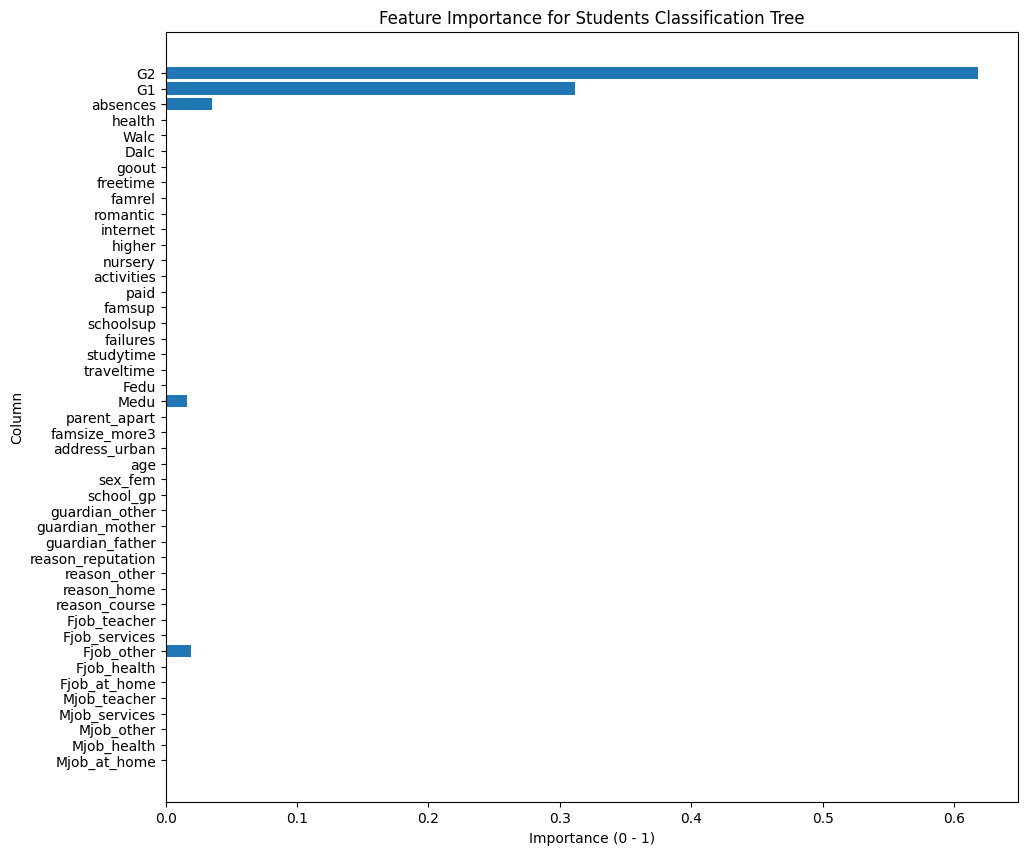

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [11.0, 10.0]

plt.barh(pruned_tree.feature_names_in_,
         pruned_tree.feature_importances_)

plt.xlabel("Importance (0 - 1)")
plt.ylabel("Column")
plt.title("Feature Importance for Students Classification Tree")
plt.show()

Let's analyze the plot; as a reminder, these were the column descriptions for the students dataset. The feature column `G2` has a lot of predictive power, followed by `G1` with about half the predictive power. Considering that both columns indicate the grades from previous academic periods, this finding is not surprising since students tend to have consistent grades throughout the year.

Interestingly, the remaining columns weren't able to generate optimal thresholds — that is, thresholds that would lead to more homogeneous groups of observations — with the exception of negligible contributions from the columns `Medu` (mother's level of education), `Mjob_at_home` (mother's job is at home / homemaker), and `Fjob_other` (father has a job that isn't teacher, health care related, in civil services, or at home).

# Optimization Parameters

There are additional steps we can take to optimize our trees. For example, there are options in the `train_test_split`() function we can experiment with. For instance, depending on the size of our dataset, we can try a different `test_size` (e.g., `0.3` instead of `0.2`).

If we're dealing with a **classification problem**, it's common to have some classes with more observations than others (imbalanced data). In these situations, we can `stratify` the target column (`y`) to keep the proportion of classes. However, if a class has very few observations, there won't be enough of them to distribute evenly, and we'll get an error.

In addition, when we instantiate decision trees, both the classification and regression versions share some parameters that can help with our optimization goals:

* `max_depth:` as we saw on a previous screen, if we don't control the number of levels, the whole tree will be generated. For this reason, in real life, we usually set this parameter when instantiating the tree for the first time. scikit-learn recommends `3` as default value to start.

* `criterion:` although we've already looked at the four basic criteria, remember there are advanced ones as well: friedman_mse and poisson for regression, and log_loss for classification.

The following parameters, which can also be set during instantiation, control how splits are made on the nodes:

* `min_samples_split:` the minimum number of observations required to split an internal node. If the node doesn't meet the number, it becomes an impure leaf with mixed values in the target column.

* `max_features:` the number of feature columns to consider when searching for the optimal threshold.

* `min_impurity_decrease:` a node will only be split if it causes a reduction in the weighted impurity that is greater than or equal to the value set in this parameter.

The parameters below are related to the leaves:

* `min_samples_leaf`: the minimum number of observations required for each leaf node. With this parameter, we avoid creating leaves that only have one or two observations, which helps avoid overfitting.

* `max_leaf_nodes:` establishes the maximum number of leaves the tree can have. The nodes created will be decided based on their relative reduction in impurity — in other words, the best ones will have priority.

* `min_weight_fraction_leaf:` this is related to an advanced technique: when we fit the data, we can assign weights to our observations. In these situations, we can use this parameter to set the minimum weighted fraction of the total sum of weights (for each observation) that needs to be at a leaf node.

In addition to all these common parameters, the `DecisionTreeClassifier `constructor also has the following:

`class_weight:` if the frequency of the classes in the target column is unbalanced, by setting the parameter to `balanced`, it will assign weights to each class to compensate for this issue.


In [13]:
# THIS IS A CLASSIFICATION EXERCISE.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df_clf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/students_clf.csv", sep=";")

X = df_clf.drop(["G3_qual"], axis=1)
y = df_clf["G3_qual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=24)


class_tree = DecisionTreeClassifier( max_depth=4, random_state=24,min_samples_split=50,max_features=30,min_samples_leaf=4)
class_tree.fit(X_train, y_train)
score = class_tree.score(X_test,y_test)
print(score)

0.7846153846153846


# Minimal Cost-Complexity Pruning

As we mentioned on the previous screen, both classification and regression trees have one last optimization parameter we'll look at: `ccp_alpha`. This parameter sets a penalty on trees that use a lot of leaves, which acts as a **penalty to overfitting.**

This is part of [Minimal Cost-Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html), an optimization technique that generates a series of subtrees with varying number of leaves, and then for each subtree, it **sums the impurity or misclassification rate of all its leaves**. Finally, it adds to that **sum the number of leaves multiplied by the value of ccp_alpha** (referred to as alpha). This is how the calculation is performed on every subtree:

$\displaystyle\text{Subtree}_N = \sum\text{Impurity of All Leaves} + (\text{Number of Leaves} \times \text{ccp_alpha})$

With this technique, if we have an unpruned subtree, the sum of impurity of all leaves would be 0 because the leaves would be completely homogeneous. However, due to the large number of leaves, it would be penalized when it's multiplied by the **alpha** value. So in this way, Minimal Cost Complexity Pruning **aims to find the pruned subtree with the lowest impurity/misclassification rate.**

Now let's apply this technique to an unpruned classification tree trained on the students dataset. The challenge here is to determine the optimal alpha, but both classification and regression Trees have the `cost_complexity_pruning_path()` function which needs to be fit on `X_train` and `y_train`. The cost path object has an attribute, .ccp_alphas, which is an array of optimal alphas obtained during pruning:

    cost_tree = DecisionTree(random_state = 14)
    cost_path = cost_tree.cost_complexity_pruning_path(X_train, y_train)
    print(cost_path.ccp_alphas)

    array([0., 0.00184793, 0.00192731, 0.00195791, 0.00195791, 0.00195791, 0.0020024 , 0.0020024 , 0.00209251, 0.00211087, 0.00213028, 0.00213159, 0.00220264, 0.00220264, 0.00220264, 0.00263644, 0.0027533 , 0.00287845, 0.00293686, 0.00313265,  0.00330396, 0.00330396, 0.00330396, 0.00330396, 0.00330396, 0.00333734, 0.00335725, 0.00339064, 0.00352089, 0.00352423, 0.00352423, 0.00385463, 0.00391581, 0.00395011, 0.00402769, 0.0040443, 0.00407897, 0.0043793 , 0.00491224, 0.00525761, 0.00577978, 0.00607904, 0.0064382 , 0.00660793, 0.00744182, 0.00896421, 0.00917053, 0.01369514, 0.01478993, 0.01591161, 0.01770506, 0.03354801, 0.09618458, 0.14911078])

After this, we need to use each obtained **alpha** to train every "candidate" subtree, and we'll store the resulting subtrees in a list:

    subtrees = []

    for alpha in cost_path.ccp_alphas:    
        subtree = DecisionTree(random_state = 14, ccp_alpha = alpha)    
        subtree.fit(X_train, y_train)    
        subtrees.append(subtree)

Since we'll get a long list of subtrees, we can use a line plot to quickly tell which is the subtree with the **alpha** that ensures the highest score. But considering this plot can be huge, we might want to only display a specific slice of subtrees, so it's best to create some easy-to-adjust variables for it. In the following code, note that both slices are required to match; otherwise, we'll get errors later:

    ccp_alphas_slice = cost_path.ccp_alphas[-10:-3]
    subtrees_slice = subtrees[-10:-3]



##Finding optimal Alpha
For each subtree, we get the scores (**R²** or the accuracy, depending on the type of tree) and we store them in a variable:

    subtree_scores = [subtree.score(X_test, y_test) for subtree in subtrees_slice]

And now we can plot the subtree scores, along with the alphas that each subtree was trained upon:

    import matplotlib.pyplot as plt

    plt.rcParams["figure.figsize"] = [10.0, 6.0]

    fig, ax = plt.subplots()
    ax.set_xlabel("Alpha")
    ax.set_ylabel("Score")
    ax.set_title("Score per Alpha Value")
    ax.plot(ccp_alphas_slice, subtree_scores, marker="o")
    plt.show()

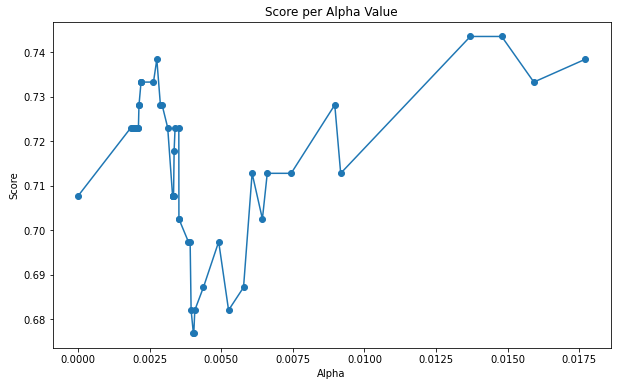

Since it generates the highest score, we see that the optimal alpha lies between **0.013 and 0.015**, but to be certain, we can easily get it like so:

    alpha_scores = tuple(zip(ccp_alphas_slice, subtree_scores))
    print(max(alpha_scores, key=lambda x:x[1]))

This line of code allows us to confirm the optimal alpha is
0.0137, with an associated subtree score of 0.7436 (both values were rounded to four decimals).

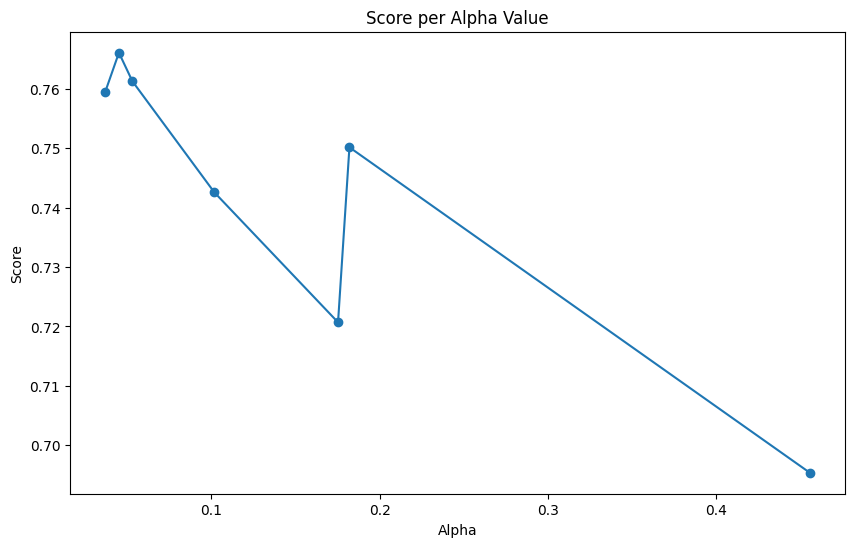

0.0452


In [15]:
# THIS IS A REGRESSION EXERCISE.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_reg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/students_reg.csv", sep=";")

X = df_reg.drop(["G3"], axis=1)
y = df_reg["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=24)

unpruned_tree = DecisionTreeRegressor(random_state=14)

#getting complexity pruning path
cost_path = unpruned_tree.cost_complexity_pruning_path(X_train, y_train)
#print(cost_path.ccp_alphas)

subtrees = []

for alpha in cost_path.ccp_alphas:

    #Instantiate a regression tree for each ccp_alpha
    subtree = DecisionTreeRegressor(random_state = 14, ccp_alpha = alpha)
    subtree.fit(X_train, y_train)
    subtrees.append(subtree)

#select only the alphas in the cost complexity pruning path variable between [-10:-3]
ccp_alphas_slice = cost_path.ccp_alphas[-10:-3]

#Create a complementary variable, subtrees_slice, to select only the subtrees in the subtrees variable between
subtrees_slice = subtrees[-10:-3]

#Get the scores for every subtree in subtrees_slice
subtree_scores = [subtree.score(X_test, y_test) for subtree in subtrees_slice]

#Create a line plot to visualize the alphas
plt.rcParams["figure.figsize"] = [10.0, 6.0]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Score")
ax.set_title("Score per Alpha Value")
ax.plot(ccp_alphas_slice, subtree_scores, marker="o")
plt.show()

#Merge the variables ccp_alphas_slice and subtree_scores into a tuple
alpha_scores = tuple(zip(ccp_alphas_slice, subtree_scores))

answer = round(max(alpha_scores, key=lambda x:x[1])[0],4)

print(answer)

